In [1]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from scipy.sparse import csr_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_pickle('/kaggle/input/forvotingdataset/all_enron_emails_preprocessed.pkl')

In [3]:
df.drop(['responses', 'is_reply'], axis=1, inplace=True)
df.fillna(0, inplace=True)

In [4]:
X = df.drop(columns=['answered'])
y = df['answered']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [6]:
voting_model = joblib.load('/kaggle/input/forvotingdataset/voting_classifier.pkl')

In [7]:
voting_predict = voting_model.predict(X_test)

In [8]:
precision = precision_score(y_test, voting_predict)
precision

0.8248118504360291

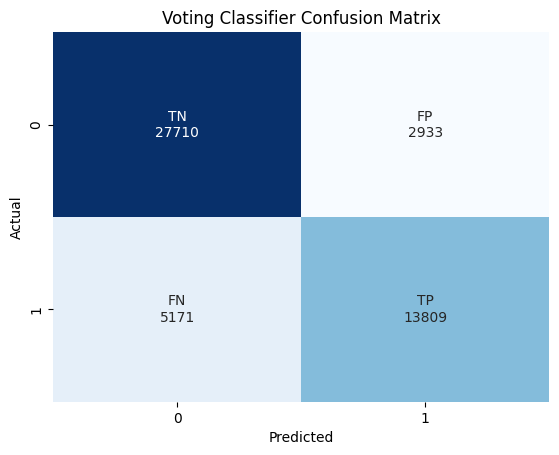

In [9]:
# Compute confusion matrix with the new threshold
cm = confusion_matrix(y_test, voting_predict)

# Define labels for annotation
labels = ['TN', 'FP', 'FN', 'TP']
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]

# Combine labels and counts
annotations = [f'{label}\n{count}' for label, count in zip(labels, counts)]
annotations = np.asarray(annotations).reshape(2, 2)

# Plot confusion matrix with annotations
sns.heatmap(cm, annot=annotations, cmap='Blues', fmt='', cbar=False)
plt.title(f'Voting Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('votin_classifier_cm.png')
plt.show()


0.9177766719473489


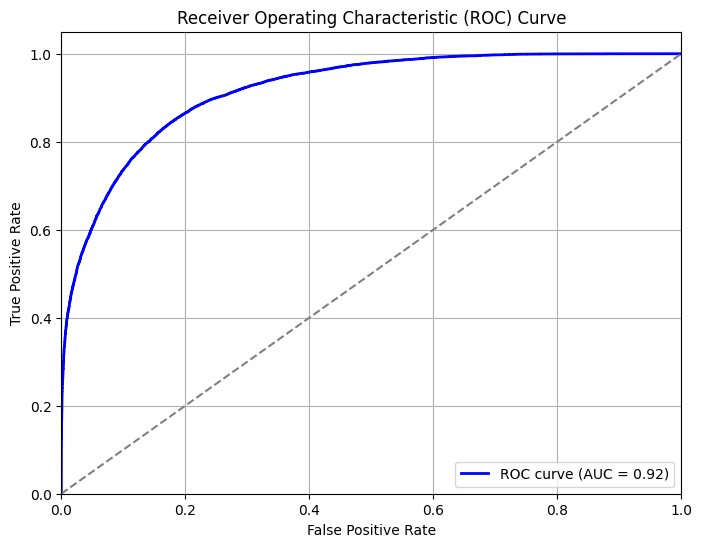

In [10]:
# Compute predicted probabilities for the positive class
voting_proba = voting_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, voting_proba)

# Compute AUC score
auc_score = roc_auc_score(y_test, voting_proba)
print(auc_score)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.savefig('ROC-curve.png')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [11]:
# Get predicted probabilities instead of predicted class labels
voting_proba = voting_model.predict_proba(X_test)

In [12]:
# Ensure y_test is a 1D array
if len(y_test.shape) > 1 and y_test.shape[1] == 2:
    y_test = y_test[:, 1]  # or another method to convert it to a 1D array

# Ensure voting_proba is a 1D array of probabilities for the positive class
if len(voting_proba.shape) > 1:
    voting_proba = voting_proba[:, 1]

In [13]:
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score

# ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, voting_proba)
# Youden's J statistic
j_scores = tpr - fpr
optimal_idx_roc = np.argmax(j_scores)
optimal_threshold_roc = thresholds_roc[optimal_idx_roc]

print(f'Optimal threshold based on ROC curve (Youden\'s J): {optimal_threshold_roc}')

Optimal threshold based on ROC curve (Youden's J): 0.36342468546031625


In [14]:
# Define a new threshold (e.g., 0.6)
new_threshold = 0.58

# Apply the new threshold to classify instances
voting_predict_new_threshold = (voting_proba >= new_threshold).astype(int)

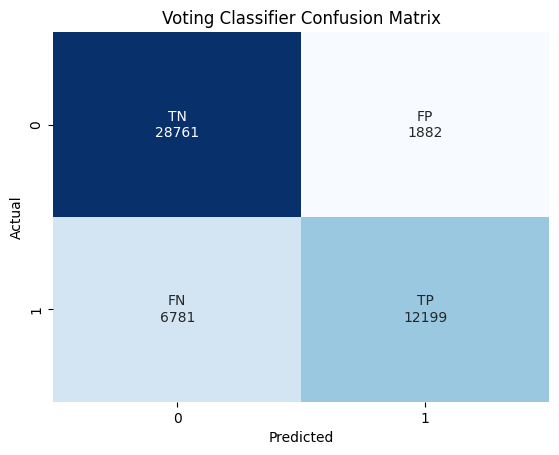

In [16]:
# Compute confusion matrix with the new threshold
cm = confusion_matrix(y_test, voting_predict_new_threshold)

# Define labels for annotation
labels = ['TN', 'FP', 'FN', 'TP']
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]

# Combine labels and counts
annotations = [f'{label}\n{count}' for label, count in zip(labels, counts)]
annotations = np.asarray(annotations).reshape(2, 2)

# Plot confusion matrix with annotations
sns.heatmap(cm, annot=annotations, cmap='Blues', fmt='', cbar=False)
plt.title('Voting Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('voting_classifier_cm.png')
plt.show()
